⚠️ Download failed! Please upload your own image.


Saving cat-1.jpeg to cat-1 (3).jpeg


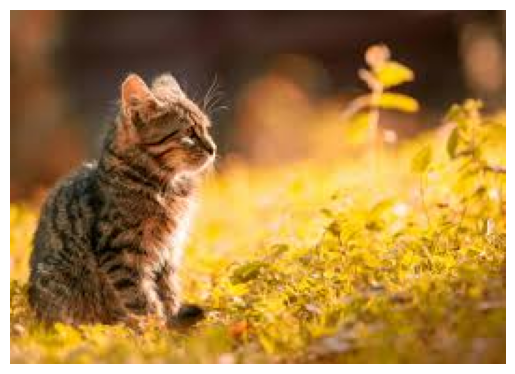

Caption: a cat sitting in the middle of a field 


In [7]:
import torch
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from PIL import Image
from transformers.utils import hub
import requests
from google.colab import files
import matplotlib.pyplot as plt
import os

# Increase timeout for Hugging Face downloads
hub.HUGGINGFACE_HUB_HTTP_TIMEOUT = 60

# Load the model and tokenizer
model_name = "nlpconnect/vit-gpt2-image-captioning"
model = VisionEncoderDecoderModel.from_pretrained(model_name)
processor = ViTImageProcessor.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Function to generate caption
def generate_caption(image_path, max_length=30, num_beams=4):
    image = Image.open(image_path).convert("RGB")
    pixel_values = processor(images=image, return_tensors="pt").pixel_values.to(device)
    output_ids = model.generate(pixel_values, max_length=max_length, num_beams=num_beams, early_stopping=True)
    caption = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return caption

# Try to download a valid image
img_path = "/content/cat-1.jpeg"
url = "https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg"  # Verified working URL

print("Downloading image...")
response = requests.get(url, stream=True)

if response.status_code == 200:
    with open(img_path, "wb") as f:
        for chunk in response.iter_content(1024):
            f.write(chunk)
    print("✅ Image downloaded successfully:", img_path)
else:
    print("⚠️ Download failed! Please upload your own image.")
    uploaded = files.upload()
    img_path = list(uploaded.keys())[0]

# Verify file validity
if not os.path.exists(img_path) or os.path.getsize(img_path) < 1024:
    print("⚠️ File seems invalid or empty. Please upload a valid image file.")
    uploaded = files.upload()
    img_path = list(uploaded.keys())[0]

# Display image
image = Image.open(img_path)
plt.imshow(image)
plt.axis("off")
plt.show()

# Generate and print caption
print("Caption:", generate_caption(img_path))
